In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
import math
warnings.filterwarnings('ignore')

In [ ]:
# loading the dataset.
# As the dataset column values is separated by a "tab", that is why I'm using '\t' as a separater to separate column values
# Then I'm adding the column names, as it is not mentioned in the dataset file
dataset = pd.read_csv('/content/airfoil_self_noise.dat', sep='\t', names = ['freq(hz)', 'angle(deg)', 'chord_len(m)', 'velocity(m/s)', 'SSDT(m)','SSPL(decibel)'])
dataset.head()

,freq(hz),angle(deg),chord_len(m),velocity(m/s),SSDT(m),SSPL(decibel)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# **Data Visualization**

### Data Distribution

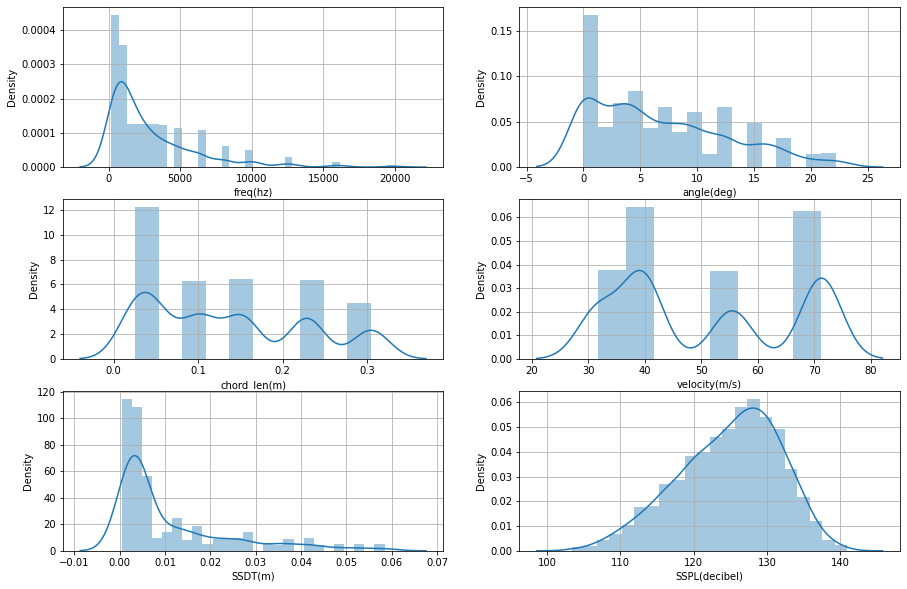

In [ ]:
# We are using distplot to show the distribution of all the columns data using seaborn library.
# On the x-axis, we have the column values, and on the y-axis, we have the density of each value in the column.

# If we clearly observe the first graph, we can see that how the frequency values are distributed among the dataset.
# Like, most of the values in the frequency column lies within the range of 1 to 1500 Hz approximately.

plt.figure(figsize=(15, 10))
column_names = list(dataset.columns.values)

for i in range(len(column_names)):
  plt.subplot(3, 2, i+1)
  sns.distplot(dataset[column_names[i]], hist=True)
  plt.grid()

plt.show()

### Scatter Plots

<Figure size 1440x720 with 0 Axes>

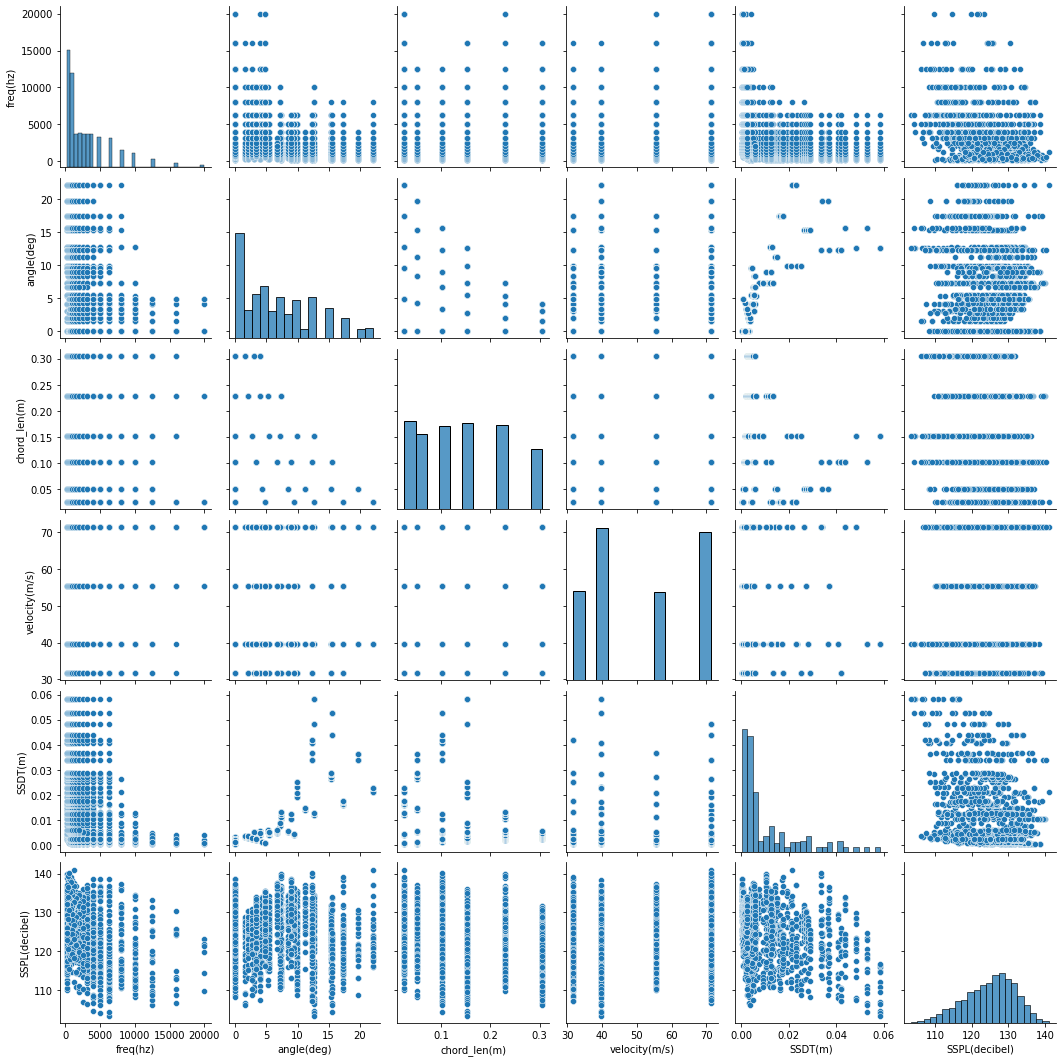

In [ ]:
# Scatter plots to understand relationship between different columns and segregation of classes.

# As we can see that, there is one histogram in each row, because there x, and y axis have the same values, and 
# histogram is drawn only with respect to one column. But the remaining graphs are scatter plots, as it is drawn 
# with respect to two column values.

plt.figure(figsize=(20, 10))
sns.pairplot(dataset)
plt.show()

### Correlation Matrix

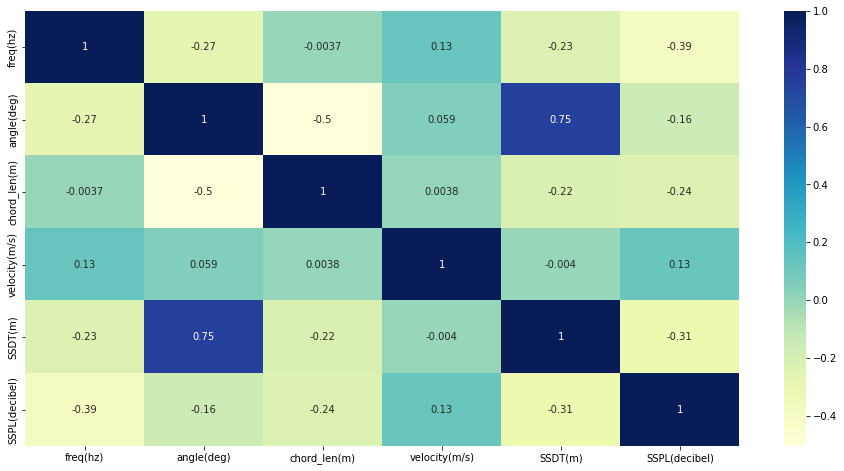

In [ ]:
# Correlation matrix & Heatmap to understand dependence among independent variables

# with this heatmap, we can observe that, there is a heavy positive correlation between
# the "angle" and "SSDT" column values.

plt.figure(figsize=(16,8))
correlation = dataset.corr()
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

# **Data Preparation and Analysis**

In [ ]:
# Removing the redundant column from the table.
dataset = dataset.drop(columns=['angle(deg)'], axis=1)
dataset.head()

,freq(hz),chord_len(m),velocity(m/s),SSDT(m),SSPL(decibel)
0,800,0.3048,71.3,0.002663,126.201
1,1000,0.3048,71.3,0.002663,125.201
2,1250,0.3048,71.3,0.002663,125.951
3,1600,0.3048,71.3,0.002663,127.591
4,2000,0.3048,71.3,0.002663,127.461


In [ ]:
# Shape function will tell us about the number of rows and columns in the dataset
# This shows that our dataset contains 1503 rows, and 5 columns
dataset.shape

(1503, 5)

In [ ]:
# This "describe" function is used to describe both the statistical values, and the maximum 
# value for each column.
dataset.describe()

,freq(hz),chord_len(m),velocity(m/s),SSDT(m),SSPL(decibel)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,0.136548,50.860745,0.011140,124.835943
std,3152.573137,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,0.304800,71.300000,0.058411,140.987000


In [ ]:
# Now I'm checking for any missing or NULL value in the dataset
# As we can see that the values for each column is zero, which means, 
# that there is no null or missing value in each column.
dataset.isnull().sum()

freq(hz)         0
chord_len(m)     0
velocity(m/s)    0
SSDT(m)          0
SSPL(decibel)    0
dtype: int64

# **Linear Regression Model Creation**

In [ ]:
# Separating the target variable
X = dataset.drop(columns=['SSPL(decibel)'])
Y = dataset['SSPL(decibel)']

In [ ]:
# Splitting the dataset for training and testing

# Here in this, I'm splitting the dataset into training and testing, by giving around 15% of dataset to
# test and remaining 85% to training. Then I'm fixing random state to 3, which helps to distribute data
# within train and test randomly.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=3)
print(f"{x_train.shape} {y_train.shape} {x_test.shape} {y_test.shape}")

(1277, 4) (1277,) (226, 4) (226,)


In [ ]:
# Scaling the dataset to increase the performance of the model
# Scaling fix the value range for each value in the range [-1, 1].
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Creating the model
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# making predictions on train dataset, and test dataset.
train_prediction = linear_regression_model.predict(x_train)
test_prediction = linear_regression_model.predict(x_test)
train_prediction

array([128.91605108, 130.33884766, 126.85362619, ..., 123.92175951,
       122.17252045, 128.21713958])

In [ ]:
# model to make any sample prediction.
linear_regression_model.predict([[-0.23786052,  0.77819273, -0.9537699,  0.28083792]])

array([121.39715476])

In [ ]:
# this will show the hypothesis coefficient of the model.
linear_regression_model.coef_

array([-3.75840227, -2.4405365 ,  1.43314651, -3.44609102])

# **Losses**

1. **RMSE**: It stands for **root mean square error**. The distance between the data points and the regression line is measured by residuals, and the spread of these residuals is measured by RMSE. In other words, it provides information on how tightly the data is clustered around the line of best fit.

**Formula**: sqrt(MSE) = sqrt ( mean (yi - y_pred) ^ 2 )

2. **MSE**: It stands for **mean squared error**. The average squared error, or the difference in value between the predicted and actual values is measured by MSE.

**Formula**: mean (yi - y_pred) ^ 2 

3. **MAE**: Stands for **mean absolute error**. In simple terms, it is the average of all the absolute errors.

**Formula**: mean ( abs( yi - y_pred ) )

In [ ]:
# building MSE, RMSE, and MAE using the np functions.

def mean_square_error(y, y_predicted): 
  difference = np.subtract(y, y_predicted)
  return np.square(difference).mean()

def root_mean_square_error(y, y_predicted):
  return math.sqrt(mean_square_error(y, y_predicted))

def mean_absolute_error(y, y_predicted):
  summation = 0
  y_predicted = list(y_predicted)
  y = list(y)
  for i in range(len(y)):
    summation += abs(y[i] - y_predicted[i])

  return summation/len(y)

In [ ]:
print(mean_absolute_error(y_train, train_prediction))

3.867625676879548


In [ ]:
# Losses using sklearn library
mse_loss = mean_squared_error(y_test, test_prediction)
rmse_loss = math.sqrt(mse_loss)
mae_loss = mean_absolute_error(y_test, test_prediction)

print(f"MSE: {mse_loss}, RMSE: {rmse_loss}, MAE: {mae_loss}")

MSE: 24.964463884801404, RMSE: 4.996445124766348, MAE: 3.947502629156176


In [ ]:
print(f"R-Square Score (Training Data): {r2_score(y_train, train_prediction)*100}")
print(f"R-Square Score (Testing Data): {r2_score(y_test, test_prediction)*100}")

R-Square Score (Training Data): 48.042625638151804
R-Square Score (Testing Data): 45.32866253635145
